In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
import itertools
import PIL

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## [1] SNPs

### Load SNP genotype matrix and Annotation Files

In [3]:
#load isolate annotation file (columns of Genotype Matrix)
SNP_isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

#load SNP annotation file (rows of Genotype Matrix) with gene annotation information
SNP_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_SNP_annotation.pkl')

#load SNP functional annotation file
SNP_func_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_SNP_functional_annotation.pkl')

#load Genotypes Matrix
SNP_genotypes_array =  np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_matrix.npy')

### Get the number of singleton SNPs

1. For each row of matrix (SNP) we will count the number of **0's**, **1's**, **2's** and **3's**.
1. For each SNP we will take the max( number of 0's , number of 1's , number of 2's , number of 3's ) to get a count of the **major allele**
1. For each SNP we will sum up the total number of isolates with a designated allele (not a 9), to get the count of **non-missing** calls
1. We will then subtract the **count of major alleles** from the **number of non-missing calls** to get the number of isolates with the minor allele(s) for each SNP.
1. We will count the number of SNPs for which there exists a minor allele in exactly 1 isolate

In [ ]:
genotypes_matrix_SNP_0_count = list( np.sum( SNP_genotypes_array == 0 , axis = 1 ) ) #A
genotypes_matrix_SNP_1_count = list( np.sum( SNP_genotypes_array == 1 , axis = 1 ) ) #C
genotypes_matrix_SNP_2_count = list( np.sum( SNP_genotypes_array == 2 , axis = 1 ) ) #G
genotypes_matrix_SNP_3_count = list( np.sum( SNP_genotypes_array == 3 , axis = 1 ) ) #T

genotypes_matrix_SNP_non_missing_count = np.sum( SNP_genotypes_array != 9 , axis = 1 ) #Non-Missing Data
genotypes_matrix_major_allele_count = np.array( [ max(zero_count , one_count , two_count , three_count) for zero_count , one_count , two_count , three_count in zip(genotypes_matrix_SNP_0_count , genotypes_matrix_SNP_1_count , genotypes_matrix_SNP_2_count , genotypes_matrix_SNP_3_count) ] )

#Number of isolates with the minor allele(s) for each SNP
genotypes_matrix_minor_alleles_count = genotypes_matrix_SNP_non_missing_count - genotypes_matrix_major_allele_count

In [ ]:
genotypes_matrix_minor_alleles_count

In [ ]:
len(genotypes_matrix_minor_alleles_count)

#### Number of SNPs in which the minor (alternate or reference) allele(s) is present in exactly 1 isolate.

In [8]:
np.sum( np.array( genotypes_matrix_minor_alleles_count ) == 1 )

422891

In [9]:
np.sum( np.array( genotypes_matrix_minor_alleles_count ) == 2 )

148350

In [6]:
allele_code_map_dict = {'A':0 , 'C':1 , 'G':2 , 'T':3}
allele_code_map_dict_r = {0:'A' , 1:'C' , 2:'G' , 3:'T'}

In [7]:
SNP_isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [8]:
np.shape(SNP_isolate_annotation_DF)

(31428, 14)

In [9]:
SNP_annotation_DF.head()

,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
0,48,C,[T],Rv0001,47.0,Essential,dnaA
1,64,G,[C],Rv0001,63.0,Essential,dnaA
2,67,G,"[A, T]",Rv0001,66.0,Essential,dnaA
3,69,C,[T],Rv0001,68.0,Essential,dnaA
4,71,C,[T],Rv0001,70.0,Essential,dnaA


In [10]:
np.shape(SNP_annotation_DF)

(782565, 7)

In [11]:
SNP_func_annotation_DF.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,SNP_type,AA_change
48_T,48,C,T,Essential,dnaA,Rv0001,48,S,V16V
64_C,64,G,C,Essential,dnaA,Rv0001,64,N,G22R
67_A,67,G,A,Essential,dnaA,Rv0001,67,N,D23N
67_T,67,G,T,Essential,dnaA,Rv0001,67,N,D23Y
69_T,69,C,T,Essential,dnaA,Rv0001,69,S,D23D


In [12]:
np.shape(SNP_func_annotation_DF)

(844429, 9)

In [13]:
np.shape(SNP_genotypes_array)

(782565, 31428)

### t-SNE

Import t-SNE embeddings
- perplex = 200
- lr = 2500

In [14]:
t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt')

In [15]:
t_SNE_coords

array([[ 15.77039433, -31.88985825],
       [ 47.15923691, -36.95353317],
       [ 12.14623451,  71.26150513],
       ...,
       [-15.47960186,  38.40433884],
       [ 16.71702766, -43.72228622],
       [ 68.94006348,  35.38974762]])

In [16]:
np.shape(t_SNE_coords)

(31428, 2)

In [17]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 9})
plt.rc('font', family='serif')

## [2] Plot isolates by tree group

In [18]:
SNP_isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [19]:
## fig, ax = plt.subplots()

def fig_A(ax):

    circ_size = 14
    alpha = 0.85
    linewidth = 0.1

    #lineage 2
    L2 = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '2'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 4A
    L4A = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '4A'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '4A']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 4B
    L4B = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '4B'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '4B']  , color = 'xkcd:light red' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 4C
    L4C = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '4C'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '4C']  , color = 'xkcd:orange' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 1
    L1 = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '1'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '1']  , color = 'xkcd:bright pink' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 3
    L3 = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '3'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 5
    L5 = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '5'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    #lineage 6
    L6 = ax.scatter( t_SNE_coords[: , 0][SNP_isolate_annotation_DF.group == '6'] , t_SNE_coords[: , 1][SNP_isolate_annotation_DF.group == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((L1, L2, L3, L4A, L4B, L4C, L5, L6), ('1', '2', '3', '4A', '4B', '4C', '5', '6') , bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=8, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.00)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

    '''
    fig = plt.gcf()
    fig.set_size_inches(6.0, 6.0)
    fig.tight_layout()

    #file_name = '/n/data1/hms/dbmi/farhat/Roger/sassetti_lab_collaboration/figures/homplasy tSNE plots/{0}.png'.format('global_lineages')
    #plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()
    '''

### *Function* to plot t-SNE & label isolates with a mutant allele (SNPs)

In [20]:
def t_SNE_label_isolates_with_SNP(pos_i , mut_allele , SNP_label, ax):
    
    ## fig, ax = plt.subplots()
    
    #Get Genotypes for SNP
    #get row index of genotypes matrix that corresponds to this row
    SNP_site_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == pos_i].index.values[0]

    #get the genotypes for all isolates
    SNP_site_genotypes = SNP_genotypes_array[SNP_site_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = SNP_site_genotypes == allele_code_map_dict[mut_allele]

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = SNP_site_genotypes != allele_code_map_dict[mut_allele]
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.1 , alpha = 0.55 , s = 14)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 11)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates, other_isolates), (SNP_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1 , fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.00)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)
    
    #plot parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

    '''
    fig = plt.gcf()
    fig.set_size_inches(6.0, 6.0)
    fig.tight_layout()

    #file_name = '/n/data1/hms/dbmi/farhat/Roger/sassetti_lab_collaboration/figures/homplasy tSNE plots/{0}.png'.format(SNP_label)
    #plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()
    '''

### Plot isolates by specific mutation

### *rpoB*

In [ ]:
t_SNE_label_isolates_with_SNP(761155, 'T', 'rpoB S450L')

### *esxW*

In [ ]:
t_SNE_label_isolates_with_SNP(4060588, 'C', 'esxW T2A')

### *lldD2*

In [ ]:
t_SNE_label_isolates_with_SNP(2123145, 'T', 'lldD2 V3I')

In [ ]:
t_SNE_label_isolates_with_SNP(2122395, 'T', 'lldD2 V253M')

## [3] INDELs

### Load INDEL genotype matrix and Annotation Files

In [21]:
#load isolate annotation file (columns of Genotype Matrix)
INDEL_isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

#load INDEL annotation file (rows of Genotype Matrix) with gene annotation information
INDEL_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_INDEL_annotation.pkl')

#load INDEL functional annotation file
INDEL_func_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_INDEL_functional_annotation.pkl')

#load Genotypes Matrix
INDEL_genotypes_array = np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_matrix.npy')

we have to re-order the rows of the **tSNE** embeddings per the isolate annoation order for the INDEL genotypes

In [22]:
#load isolate annotation file (columns of Genotype Matrix)
SNP_isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

reorder_index_df = pd.DataFrame(SNP_isolate_annotation_DF.loc[:, "isolate_ID"]) # pull SNP isolate annotation & row index
reorder_index_df.loc[:, 'SNP_row_index'] = list(reorder_index_df.index) # make row index a separate col
reorder_index_df.set_index('isolate_ID', inplace = True, drop = True) # set index to the isolate IDs
INDEL_isolate_ID_order_list = list(INDEL_isolate_annotation_DF.isolate_ID) # get the order of isolates for the INDEL genotypes matrix
tSNE_row_reordered_for_INDELs = np.array(list(reorder_index_df.loc[INDEL_isolate_ID_order_list, :].SNP_row_index)) # re-order the row indices of the SNP genotypes matrix according to the order of isolates for the INDEL genotypes matrix

t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt') # load tSNE coords
t_SNE_coords_INDELs = t_SNE_coords[tSNE_row_reordered_for_INDELs,:] # re-order rows of the tSNE matrix

### Get the number of singleton INDELs

In [23]:
genotypes_matrix_INDEL_0_count = list( np.sum( INDEL_genotypes_array == 0 , axis = 1 ) ) # has INDEL variant
genotypes_matrix_INDEL_1_count = list( np.sum( INDEL_genotypes_array == 1 , axis = 1 ) ) # doesn't have INDEL variant

genotypes_matrix_INDEL_non_missing_count = np.sum( INDEL_genotypes_array != 9 , axis = 1 ) #Non-Missing Data

#Number of isolates with the alternate allele(s) for each INDEL
genotypes_matrix_alternate_alleles_count = genotypes_matrix_INDEL_non_missing_count - genotypes_matrix_INDEL_0_count

In [24]:
genotypes_matrix_alternate_alleles_count

array([3, 3, 3, ..., 1, 3, 1])

In [25]:
len(genotypes_matrix_alternate_alleles_count)

47425

#### Number of INDELs in which the alterante allele is present in exactly 1 isolate.

In [26]:
np.sum( np.array( genotypes_matrix_alternate_alleles_count ) == 1 )

27937

In [27]:
np.sum( np.array( genotypes_matrix_alternate_alleles_count ) == 2 )

7870

In [28]:
INDEL_isolate_annotation_DF.head()

,isolate_ID,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,lineage_call,group
0,SAMN13051687,2,2,1,1,1,i3,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1.i3,2
1,SAMN09100245,4,2,1,2,1,1,i3,2,NaN,NaN,NaN,4.2.1.2.1.1.i3.2,4B
2,SAMN08732238,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1,2
3,SAMN07658260,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1.1,3
4,SAMN03648003,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1,2


In [29]:
np.shape(INDEL_isolate_annotation_DF)

(31428, 14)

In [30]:
INDEL_annotation_DF.head()

,key,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
0,ACCGACGAAG_313_A,313,ACCGACGAAG,A,Rv0001,312.0,Essential,dnaA
1,TC_1549_T,1549,TC,T,intergenic,NaN,None,None
2,T_1552_TAA,1552,T,TAA,intergenic,NaN,None,None
3,TAA_1552_T,1552,TAA,T,intergenic,NaN,None,None
4,T_1552_TA,1552,T,TA,intergenic,NaN,None,None


In [31]:
np.shape(INDEL_annotation_DF)

(47425, 8)

In [32]:
INDEL_func_annotation_DF.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos
key,,,,,,,,,,
ACCGACGAAG_313_A,313,ACCGACGAAG,A,Essential,dnaA,Rv0001,313,del,inframe,105
TC_1549_T,1549,TC,T,None,None,Rv0001_Rv0002,None,del,frameshift,None
T_1552_TAA,1552,T,TAA,None,None,Rv0001_Rv0002,None,ins,frameshift,None
TAA_1552_T,1552,TAA,T,None,None,Rv0001_Rv0002,None,del,frameshift,None
T_1552_TA,1552,T,TA,None,None,Rv0001_Rv0002,None,ins,frameshift,None


In [33]:
np.shape(INDEL_func_annotation_DF)

(47425, 10)

In [34]:
np.shape(INDEL_genotypes_array)

(47425, 31428)

### *Function* to plot t-SNE & label isolates with a mutant allele (INDELs)

In [42]:
def t_SNE_label_isolates_with_INDEL(INDEL_mut_key , INDEL_label, ax):
    
    #Get Genotypes for INDEL
    #get row index of genotypes matrix that corresponds to this row
    INDEL_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == INDEL_mut_key].index.values[0]

    #get the genotypes for all isolates
    INDEL_site_genotypes = INDEL_genotypes_array[INDEL_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = INDEL_site_genotypes == 1

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = INDEL_site_genotypes != 1
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.1 , alpha = 0.55 , s = 12)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_match_bool] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 12)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates, other_isolates), (INDEL_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.00)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)
    
    #plot parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

In [36]:
def t_SNE_label_isolates_with_INDELs(INDEL_mut_key_A, INDEL_mut_key_B, INDEL_label_A, INDEL_label_B, INDEL_color_A, INDEL_color_B, ax):
    
    # plot isolates without mutant allele
    
    other_isolates = ax.scatter( t_SNE_coords_INDELs[: , 0] , t_SNE_coords_INDELs[: , 1]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.1 , alpha = 0.55 , s = 12, zorder = 1)
    
    # plot mutation A
    
    #Get Genotypes for INDEL A
    #get row index of genotypes matrix that corresponds to this row
    INDEL_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == INDEL_mut_key_A].index.values[0]
    #get the genotypes for all isolates
    INDEL_site_genotypes = INDEL_genotypes_array[INDEL_row_index , :]
    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool_A = INDEL_site_genotypes == 1
    #isolates with mutant allele
    mut_allele_isolates_A = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_match_bool_A] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_match_bool_A]  ,  color = INDEL_color_A , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 12, zorder = 2)
    
    # plot mutation B
    
    #Get Genotypes for INDEL B
    #get row index of genotypes matrix that corresponds to this row
    INDEL_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == INDEL_mut_key_B].index.values[0]
    #get the genotypes for all isolates
    INDEL_site_genotypes = INDEL_genotypes_array[INDEL_row_index , :]
    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool_B = INDEL_site_genotypes == 1
    #isolates with mutant allele
    mut_allele_isolates_B = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_match_bool_B] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_match_bool_B]  ,  color = INDEL_color_B , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 12, zorder = 2)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates_A, mut_allele_isolates_B, other_isolates), (INDEL_label_A + ' (N = ' + str(sum(isolate_mutant_allele_match_bool_A)) + ')', INDEL_label_B + ' (N = ' + str(sum(isolate_mutant_allele_match_bool_B)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.00)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)
    
    #plot parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=8, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=8, pad = 0.0, labelcolor = 'k')

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '8' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '8', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

### Plot isolates by specific mutation

### *glpK*

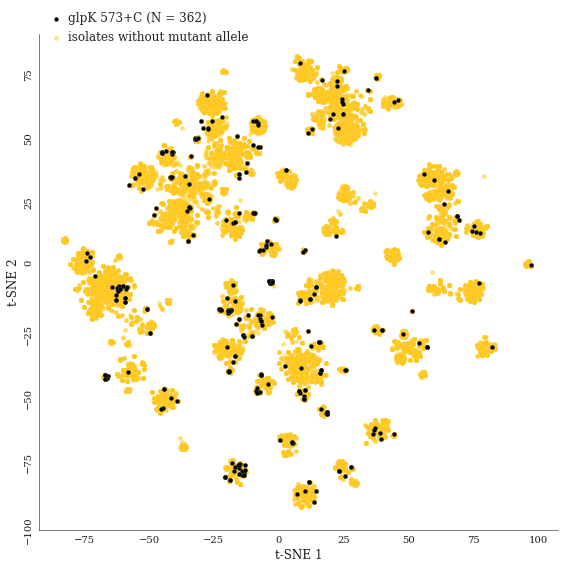

In [91]:
fig, ax = plt.subplots()
INDEL_mut_key = 'A_4139183_AC'
INDEL_label = 'glpK 573+C'
#----------------------------------

INDEL_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == INDEL_mut_key].index.values[0]

#get the genotypes for all isolates
INDEL_site_genotypes = INDEL_genotypes_array[INDEL_row_index , :]

#construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
isolate_mutant_allele_match_bool = INDEL_site_genotypes == 1

#construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
isolate_mutant_allele_no_match_bool = INDEL_site_genotypes != 1

#Plot coordinates for each isolate

#isolates without mutant allele
other_isolates = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.1 , alpha = 0.55 , s = 22)

#isolates with mutant allele
mut_allele_isolates = ax.scatter( t_SNE_coords_INDELs[: , 0][isolate_mutant_allele_match_bool] , t_SNE_coords_INDELs[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax.tick_params(axis='y', which='major', labelsize=10, pad = 0.0, labelcolor = 'k', rotation = 90)
ax.tick_params(axis='x', which='major', labelsize=10, pad = 0.0, labelcolor = 'k')

#add legend
ax.legend((mut_allele_isolates, other_isolates), (INDEL_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1, fontsize=12 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.00)

#add axis labels
ax.set_xlabel('t-SNE 1' , fontsize = '12' , color = 'k')
ax.tick_params(axis='x', pad=0.0)

ax.set_ylabel('t-SNE 2', fontsize = '12', color = 'k')
ax.tick_params(axis='y', pad=0.0)

#plot parameters
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax.tick_params(axis='y', which='major', labelsize=10, pad = 0.0, labelcolor = 'k', rotation = 90)
ax.tick_params(axis='x', which='major', labelsize=10, pad = 0.0, labelcolor = 'k')

#add axis labels
ax.set_xlabel('t-SNE 1' , fontsize = '12' , color = 'k')
ax.tick_params(axis='x', pad=0.0)

ax.set_ylabel('t-SNE 2', fontsize = '12', color = 'k')
ax.tick_params(axis='y', pad=0.0)

fig = plt.gcf()
fig.set_size_inches(8.0, 8.0)
fig.tight_layout()

plt.show()

### side-analysis into *pks15*

In [37]:
#load in SNPs
all_homoplasic_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/homoplasy_count_across_lineages.pkl')

#load in INDELs
all_homoplasic_INDELs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/INDEL homoplasies/homoplasy_count_across_lineages_spacer_4.pkl')

In [38]:
all_homoplasic_SNPs[all_homoplasic_SNPs.gene_id == 'Rv2947c'].head(n=15)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
252,3297340.0,G,A,A,Rv2947c,501,Non-Essential,S,T167T,4,9,4,10,7,11,0,1,46,pks15,222
1592,3296724.0,C,T,T,Rv2947c,1117,Non-Essential,N,G373R,0,8,0,0,0,0,0,0,8,pks15,16
2495,3296721.0,C,G,G,Rv2947c,1120,Non-Essential,N,G374R,0,3,1,1,0,1,0,0,6,pks15,2988
3532,3297203.0,T,C,C,Rv2947c,638,Non-Essential,N,D213G,0,5,0,0,0,0,0,0,5,pks15,27
5846,3297704.0,G,A,A,Rv2947c,137,Non-Essential,N,T46I,0,3,1,0,0,0,0,0,4,pks15,222
5996,3296382.0,C,A,A,Rv2947c,1459,Non-Essential,N,G487W,2,0,0,0,0,2,0,0,4,pks15,5
7676,3297770.0,A,G,G,Rv2947c,71,Non-Essential,N,L24P,0,3,0,0,0,0,0,0,3,pks15,19
7804,3297456.0,C,T,T,Rv2947c,385,Non-Essential,N,E129K,2,0,0,0,1,0,0,0,3,pks15,3
76650,3297772.0,G,A,A,Rv2947c,69,Non-Essential,S,Y23Y,1,1,0,0,0,0,0,0,2,pks15,3
80187,3297303.0,C,T,T,Rv2947c,538,Non-Essential,N,G180R,1,0,0,1,0,0,0,0,2,pks15,2


In [39]:
all_homoplasic_INDELs.loc[:,['pos','ref','alt','gene_name',
       'gene_pos', 'ins_del', 'INDEL_type', 'codon_pos', 'stop_codon',
       'key', u'1', u'2', u'3', u'4A', u'4B', u'4C', u'5', u'6', u'total',
       u'num_isolates']][all_homoplasic_INDELs.gene_id == 'Rv2947c'].head(n=15)

,pos,ref,alt,gene_name,gene_pos,ins_del,INDEL_type,codon_pos,stop_codon,key,1,2,3,4A,4B,4C,5,6,total,num_isolates
35080,3296371,G,GCCGCGGC,pks15,1470,ins,frameshift,490,elongation - appears after annotated stop,G_3296371_GCCGCGGC,129.0,313.0,197.0,0.0,0.0,1.0,9.0,0.0,649.0,6145
35106,3297297,G,GC,pks15,544,ins,frameshift,182,premature stop - first 3/4,G_3297297_GC,1.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10
35093,3296928,CCACCGCCAG,C,pks15,913,del,inframe,305,no change,CCACCGCCAG_3296928_C,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,52
35082,3296377,G,GC,pks15,1464,ins,frameshift,488,elongation - appears after annotated stop,G_3296377_GC,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,96
35094,3296945,T,TG,pks15,896,ins,frameshift,299,premature stop - first 3/4,T_3296945_TG,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,8
35104,3297282,ACC,A,pks15,559,del,frameshift,187,premature stop - first 3/4,ACC_3297282_A,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,89
35081,3296377,GC,G,pks15,1464,del,frameshift,488,elongation - appears after annotated stop,GC_3296377_G,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3
35089,3296784,T,TCCC,pks15,1057,ins,inframe,353,no change,T_3296784_TCCC,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3
35103,3297280,C,CA,pks15,561,ins,frameshift,187,premature stop - first 3/4,C_3297280_CA,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2
35083,3296378,C,CCCGCGGA,pks15,1463,ins,frameshift,488,elongation - appears after annotated stop,C_3296378_CCCGCGGA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


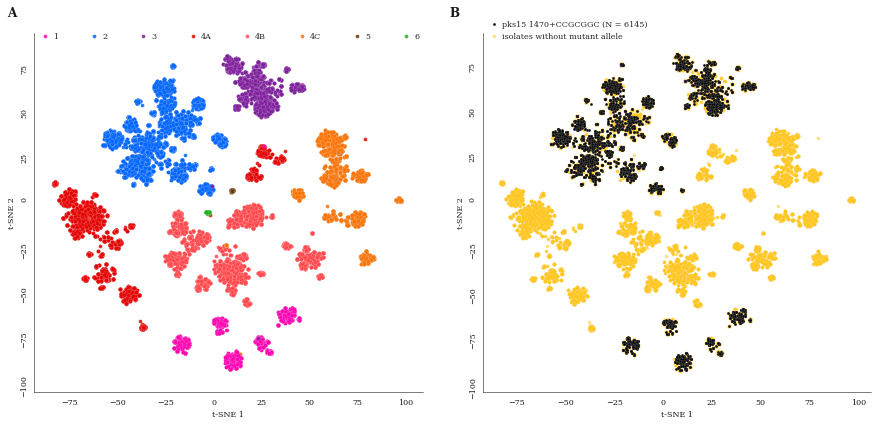

In [44]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
spec.update(wspace=0.155, hspace=0.27) # set the spacing between axes. 

axA = fig.add_subplot(spec[0, 0])
axB = fig.add_subplot(spec[0, 1])

fig_A(axA)
t_SNE_label_isolates_with_INDEL('G_3296371_GCCGCGGC', 'pks15 1470+CCGCGGC', axB)

fig.text(0.10, 0.895, 'A', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.51, 0.895, 'B', fontsize=12 , fontweight='bold' , color = 'k')

fig = plt.gcf()
fig.set_size_inches(15.0, 15.0)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/tSNE_pks15_1470_CCGCGGC_ins_mutation.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()

## [4] Create Figure with all plots

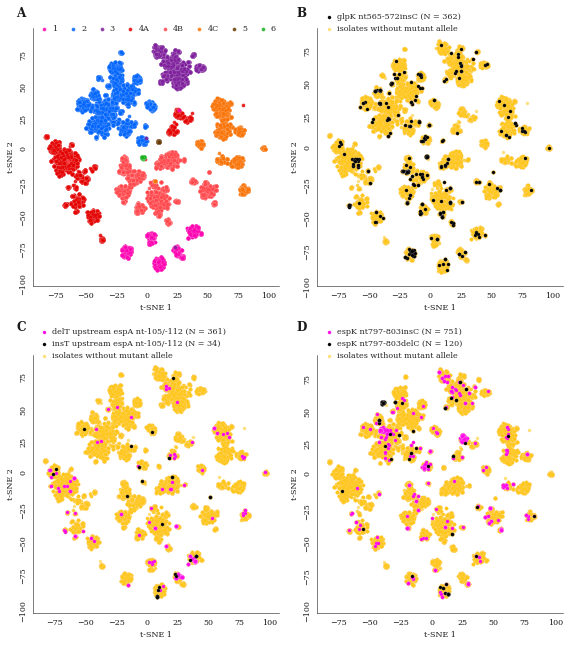

In [69]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
spec.update(wspace=0.155, hspace=0.27) # set the spacing between axes. 

axA = fig.add_subplot(spec[0, 0])
axB = fig.add_subplot(spec[0, 1])
axC = fig.add_subplot(spec[1, 0])
axD = fig.add_subplot(spec[1, 1])

fig_A(axA)
t_SNE_label_isolates_with_INDEL('A_4139183_AC', 'glpK nt565-572insC', axB)
t_SNE_label_isolates_with_INDELs('GT_4056480_G', 'G_4056480_GT', 'delT upstream espA nt-105/-112', 'insT upstream espA nt-105/-112', 'xkcd:bright magenta', 'black', axC) # variants in espA_ephA
t_SNE_label_isolates_with_INDELs('C_4358979_CG', 'CG_4358979_C', 'espK nt797-803insC', 'espK nt797-803delC', 'xkcd:bright magenta', 'black', axD) # variants in espK

fig.text(0.10, 0.895, 'A', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.51, 0.895, 'B', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.10, 0.49, 'C', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.51, 0.49, 'D', fontsize=12 , fontweight='bold' , color = 'k')

fig = plt.gcf()
fig.set_size_inches(9.5, 10.75)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/tSNE_visuals_with_convergent_mutations.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

## intergenic region between _espA_ and _ephA_

Two homoplasic INDEL variants found upstream of espA that are "reverse" variants reflecting Phase Variation in this homopolymer
espA is reverse transcribed, coordinates = [4055197, 4056375]
1. GT_4056480_G, 4056480-4056375 = 105: delT upstream espA nt-105/-112
1. G_4056480_GT, 4056480-4056375 = 105: insT upstream espA nt-105/-112

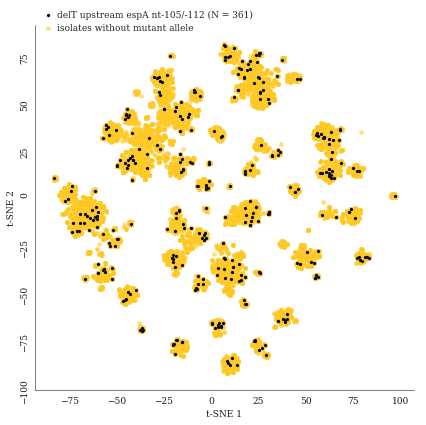

In [96]:
t_SNE_label_isolates_with_INDEL('GT_4056480_G', 'delT upstream espA nt-105/-112')

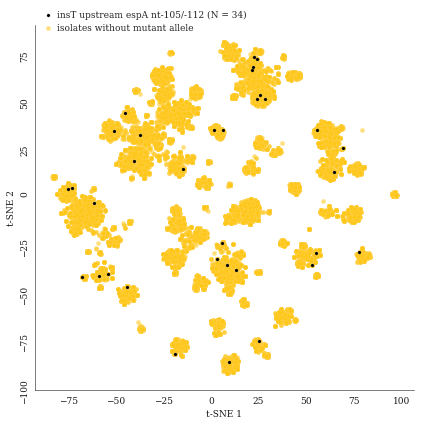

In [97]:
t_SNE_label_isolates_with_INDEL('G_4056480_GT', 'insT upstream espA nt-105/-112')

Labels give the **Nucleotide Gene Position (+strand)**

In [89]:
INDEL_func_annotation_DF.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos
key,,,,,,,,,,
ACCGACGAAG_313_A,313,ACCGACGAAG,A,Essential,dnaA,Rv0001,313,del,inframe,105
TC_1549_T,1549,TC,T,None,None,Rv0001_Rv0002,None,del,frameshift,None
T_1552_TAA,1552,T,TAA,None,None,Rv0001_Rv0002,None,ins,frameshift,None
TAA_1552_T,1552,TAA,T,None,None,Rv0001_Rv0002,None,del,frameshift,None
T_1552_TA,1552,T,TA,None,None,Rv0001_Rv0002,None,ins,frameshift,None
